In [1]:
import numpy as np
import astropy.io.fits as pyfits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

import aplpy
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams, style
from matplotlib.colors import ListedColormap

from sys import argv
import warnings
import time
import os

/usr/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
#---------------------------------------
# Input some parameters from parameter.ipynb
#---------------------------------------
%run parameter.ipynb


PI_cut3PI_Jy2mJy_B4_imageName = '%s%s_PI_cut3PI_Jy2mJy.image.fits'%(path_image, outname_b4)
PI_cut3PI_Jy2mJy_B7_imageName = '%s%s_PI_cut3PI_Jy2mJy.image.fits'%(path_image, outname_b4)
#---------------------------------------
# Input parameters used in this program:

###-------------------------------------
### Path name & outname & imageName
# path_image, path_BT, path_figure, path_samping, path_region
# outname_b4,  outname_b7
# BT_B4, BT_B7


In [3]:
def plot_pol(Fitsfile, Savefigname, \
             p_cmap, p_vmin, p_vmax, p_stretch, p_center, width_arcs):


    #----------------------------------------
    # Set the parameter
    hide_tick = False
    RA_sec2deg = np.divide(15., 3600)
    Dec_arcs2deg = np.divide(1., 3600)

    #----------------------------------------

    # Set the Coordinate of the pointing center
    if p_center == '4A1':
        ra  = Coord_4A1.ra.deg          # RA  [deg], central of 4A1
        dec = Coord_4A1.dec.deg         # Dec [deg], central of 4A1
    elif p_center == '4A2':
        ra  = Coord_4A2.ra.deg          # RA  [deg], central of 4A2
        dec = Coord_4A1.dec.deg         # Dec [deg], central of 4A2
    else:
        ra  = Coord_4A.ra.deg           # RA  [deg], central of 4A1
        dec = Coord_4A.dec.deg          # Dec  [deg], central of 4A1   

    #----------------------------------------------------------
    # Plot the figure
    #----------------------------------------------------------
    rcParams['xtick.direction'] = 'in'
    rcParams['ytick.direction'] = 'in'
    rcParams['font.size'] = 20
    rcParams['legend.fontsize'] = 20
    rcParams['figure.titlesize'] = 20
    #----------------------------------------------------------
    fig = plt.figure(figsize=(10,10))
    sub = aplpy.FITSFigure(Fitsfile, figure=fig)
    if (p_vmin == '') or (p_vmax == ''):
        sub.show_colorscale(cmap=p_cmap, stretch=p_stretch)
    else:
        sub.show_colorscale(cmap=p_cmap, vmin=p_vmin, vmax=p_vmax, stretch=p_stretch)
    sub.recenter(ra, dec, width=width_arcs/3600., height=width_arcs/3600.)
    sub.set_nan_color('white')
    sub.frame.set_linewidth(2)

    #----------------------------------------------------------
    # set the ticklabels and axislabels
    sub.tick_labels.hide()
    sub.axis_labels.hide()

    if hide_tick == False:    
        sub.tick_labels.show()
        sub.axis_labels.show()
        sub.axis_labels.set_xtext('ICRS Right Ascension')
        sub.axis_labels.set_ytext('ICRS Declination')
        sub.axis_labels.set_font(size=20)
        sub.axis_labels.set_xpad(10)
        sub.axis_labels.set_ypad(-30)

    if p_center == ('4A1' or '4A2'):
        sub.tick_labels.set_xformat('hh:mm:ss.ss')
        sub.tick_labels.set_yformat('dd:mm:ss.s')    
        sub.ticks.set_xspacing(0.05*RA_sec2deg)
        sub.ticks.set_yspacing(0.5*Dec_arcs2deg)
    else:
        sub.tick_labels.set_xformat('hh:mm:ss.s')
        sub.tick_labels.set_yformat('dd:mm:ss')
        sub.ticks.set_xspacing(0.1*RA_sec2deg)
        sub.ticks.set_yspacing(1*Dec_arcs2deg)

    #sub.ticks.hide_x()
    sub.ticks.set_color('black')
    sub.ticks.set_minor_frequency(5)
    sub.ticks.set_length(10)
    sub.ticks.set_linewidth(2)

    #----------------------------------------------------------
    # colorbar
    sub.add_colorbar()
    sub.colorbar.set_location('top')
    sub.colorbar.set_width(0.2)
    sub.colorbar.set_pad(0.1)
    #sub.colorbar.set_ticks(colorbar_bounds)
    #sub.colorbar.set_axis_label_text(colorbar_label)
    sub.colorbar.set_axis_label_font(size='25')

    #----------------------------------------------------------
    # beam
    sub.add_beam()
    sub.beam.set_color('black')
    sub.beam.set_corner('bottom right')
    sub.beam.set_alpha(0.5)

    #----------------------------------------------------------
    # plot the 100AU scale
    hundred_AU = np.divide(200.0, dist)             # 100AU on the map (arcsec)
    hundred_AU_deg = np.divide(hundred_AU, 3600.0)  # 100AU on the map (deg)
    sub.add_scalebar(hundred_AU_deg)                # (deg)
    sub.scalebar.set_corner('top right')
    sub.scalebar.set_color('black')
    sub.scalebar.set_linewidth(5) #pt
    sub.scalebar.set_label('200AU')
    sub.scalebar.set_font(size='20')
    #----------------------------------------------------------
    if hide_tick == False:
        fig.tight_layout(renderer=None, pad=0, h_pad=0, w_pad=0  ,rect=(0.2,0.01,0.94,0.96)) 
        # [left, bottom, right, top] in normalized (0, 1) figure coordinates. 

    return fig, sub

In [4]:
# create the fig & sub enviroment
fig = plt.figure(figsize=(10,10))
sub = aplpy.FITSFigure(Fitsfile, figure=fig)
plt.close()

NameError: name 'Fitsfile' is not defined

<Figure size 720x720 with 0 Axes>

INFO: Setting slices=[0, 0] [aplpy.core]


/usr/local/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:
/usr/local/lib/python2.7/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Setting slices=[0, 0] [aplpy.core]


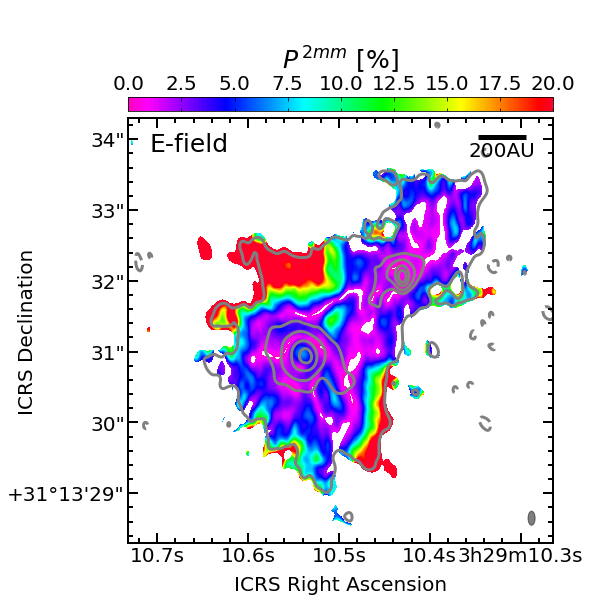

CPU times: user 18.5 s, sys: 3.43 s, total: 22 s
Wall time: 19 s


In [5]:
%%time
###-------------------------------------- 
# Set the outname
outname     = outname_b7 

# Get the Imagename
I_imageName, Q_imageName, U_imageName, PI_imageName, PI_cut3PI_imageName,\
PA_imageName, Per_imageName, Per_cut3PI_imageName, BT_imageName = slt_imageName(outname)

# Get the rms & clip critera from the different outname
rms_I, rms_Q, rms_PI, I_clip, PI_lowclip, PI_highclip, \
sampling, PI_vmax, convert_unit = slt_parm(outname)


#----------------------------------------
# Set the input parameters for the plot_pol function
#----------------------------------------
Fitsfile    = Per_cut3PI_imageName
Savefigname = '%sn1333iras4a_B4_B7.pdf'%(path_figure)

#----------------------------------------   
# Colorscale
p_cmap      = 'gist_rainbow_r'
p_vmin      = 0.
p_vmax      = 20.
p_stretch   = 'linear' #linear, arcsinh

# Center of the image
width_arcs  = 6. 
p_center    = '4A'

#----------------------------------------------------------
# Plot the figure
#----------------------------------------------------------
fig, sub = plot_pol(Fitsfile, Savefigname, \
                    p_cmap, p_vmin, p_vmax, p_stretch, p_center, width_arcs)

#----------------------------------------
# Contour
ctr_file    = I_imageName
ctr_level   = [-5, 5, 50, 100, 200, 300]
ctr_rms     = rms_I
ctr_color   = 'gray'

sub.show_contour(data=ctr_file, \
                 colors=ctr_color, smooth=1, linewidths=3, \
                 levels=np.array(ctr_level)*ctr_rms, alpha=1)

#----------------------------------------
# Region: polarization angle (line segments)

# Get the region name
reg_parm = 'all'
#  reg_parm:
# 'all', 'mask', 'mask_4A1', 'mask_4A2', 'mask_4A1_inner100au', 'mask_4A2_inner100au', 
# 'mask_4A1_wo_inner100au', 'mask_4A2_wo_inner100au'

# ALMA Band 4
output_E_reg_name_B4, output_E_reg_base_name_B4, \
output_B_reg_name_B4, output_B_reg_base_name_B4 = slt_plotName(outname_b4, reg_parm)
# ALMA Band 7
output_E_reg_name_B7, output_E_reg_base_name_B7, \
output_B_reg_name_B7, output_B_reg_base_name_B7 = slt_plotName(outname_b7, reg_parm)

# sub.show_regions(output_E_reg_base_name_B7)
# sub.show_regions(output_E_reg_name_B7)
# sub.show_regions(output_E_reg_base_name_B4)
# sub.show_regions(output_E_reg_name_B4)

#----------------------------------------
# Colorbar
colorbar_bounds = [0,1,2,4,8,16,32]
colorbar_label = r'$P^{\,2mm}$ [%]'

# sub.colorbar.set_ticks(colorbar_bounds)
sub.colorbar.set_axis_label_text(colorbar_label)

#----------------------------------------
# Label
sub.add_label(0.05, 0.94, 'E-field', color='black', size=25, \
              relative=True, horizontalalignment='left')

#----------------------------------------------------------
# Savefigure
fig.savefig(Savefigname)
plt.show()

In [ ]:
%%time
###-------------------------------------- 
# Set the outname
outname     = outname_b7 

# Get the Imagename
I_imageName, Q_imageName, U_imageName, PI_imageName, PI_cut3PI_imageName,\
PA_imageName, Per_imageName, Per_cut3PI_imageName, BT_imageName = slt_imageName(outname)

# Get the rms & clip critera from the different outname
rms_I, rms_Q, rms_PI, I_clip, PI_lowclip, PI_highclip, \
sampling, PI_vmax, convert_unit = slt_parm(outname)


#----------------------------------------
# Set the input parameters for the plot_pol function
#----------------------------------------
Fitsfile    = PI_cut3PI_Jy2mJy_B4_imageName
Savefigname = '%sn1333iras4a_B4_B7.pdf'%(path_figure)

#----------------------------------------   
# Colorscale
p_cmap      = 'gist_rainbow_r'
p_vmin      = ''
p_vmax      = ''
p_stretch   = 'linear' #linear, arcsinh

# Center of the image
width_arcs  = 6. 
p_center    = '4A'

#----------------------------------------------------------
# Plot the figure
#----------------------------------------------------------
fig, sub = plot_pol(Fitsfile, Savefigname, \
                    p_cmap, p_vmin, p_vmax, p_stretch, p_center, width_arcs)

#----------------------------------------
# Contour
ctr_file    = I_imageName
ctr_level   = [-5, 5, 50, 100, 200, 300]
ctr_rms     = rms_I
ctr_color   = 'gray'

sub.show_contour(data=ctr_file, \
                 colors=ctr_color, smooth=1, linewidths=3, \
                 levels=np.array(ctr_level)*ctr_rms, alpha=1)

#----------------------------------------
# Region: polarization angle (line segments)

# Get the region name
reg_parm = 'all'
#  reg_parm:
# 'all', 'mask', 'mask_4A1', 'mask_4A2', 'mask_4A1_inner100au', 'mask_4A2_inner100au', 
# 'mask_4A1_wo_inner100au', 'mask_4A2_wo_inner100au'

# ALMA Band 4
output_E_reg_name_B4, output_E_reg_base_name_B4, \
output_B_reg_name_B4, output_B_reg_base_name_B4 = slt_plotName(outname_b4, reg_parm)
# ALMA Band 7
output_E_reg_name_B7, output_E_reg_base_name_B7, \
output_B_reg_name_B7, output_B_reg_base_name_B7 = slt_plotName(outname_b7, reg_parm)

# sub.show_regions(output_E_reg_base_name_B7)
# sub.show_regions(output_E_reg_name_B7)
# sub.show_regions(output_E_reg_base_name_B4)
# sub.show_regions(output_E_reg_name_B4)

#----------------------------------------
# Colorbar
colorbar_bounds = [0,1,2,4,8,16,32]
colorbar_label = r'$PI^{\,2mm}$ [%]'

# sub.colorbar.set_ticks(colorbar_bounds)
sub.colorbar.set_axis_label_text(colorbar_label)

#----------------------------------------
# Label
sub.add_label(0.05, 0.94, 'E-field', color='black', size=25, \
              relative=True, horizontalalignment='left')

#----------------------------------------------------------
# Savefigure
fig.savefig(Savefigname)
plt.show()